In [79]:
# Imported the necessary libraries.
# Pandas is a library use for data manipulation and analysis
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
# To implement the Support Vector Machines we will use Scikit-learn and will import our SVM
from sklearn import svm
from sklearn.metrics import accuracy_score

In [80]:
# Importing the data or reading the data
# read_csv method of Pandas to load the data into a pandas dataframe df
df = pd.read_csv('output_file1.csv')

In [81]:
# printing the head of df.
df.head()

,FileName,Pixel,Label
0,zero_1353.jpg,141 138 138 140 142 145 146 148 150 151 152 15...,0
1,zero_1450.jpg,142 140 138 138 141 144 145 146 150 150 149 15...,0
2,zero_1409.jpg,139 136 134 135 136 139 141 143 145 146 149 14...,0
3,zero_1351.jpg,139 139 138 139 143 144 146 147 149 151 153 15...,0
4,zero_1390.jpg,139 135 134 136 137 138 142 145 149 149 151 15...,0


In [82]:
df['Pixel']=df['Pixel'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [83]:
df['Pixel']

0        [141.0, 138.0, 138.0, 140.0, 142.0, 145.0, 146...
1        [142.0, 140.0, 138.0, 138.0, 141.0, 144.0, 145...
2        [139.0, 136.0, 134.0, 135.0, 136.0, 139.0, 141...
3        [139.0, 139.0, 138.0, 139.0, 143.0, 144.0, 146...
4        [139.0, 135.0, 134.0, 136.0, 137.0, 138.0, 142...
                               ...                        
16496    [16.0, 4.0, 1.0, 1.0, 5.0, 11.0, 21.0, 28.0, 3...
16497    [157.0, 156.0, 165.0, 202.0, 206.0, 182.0, 180...
16498    [250.0, 251.0, 251.0, 251.0, 251.0, 251.0, 250...
16499    [199.0, 233.0, 230.0, 230.0, 229.0, 223.0, 207...
16500    [43.0, 42.0, 41.0, 44.0, 43.0, 42.0, 47.0, 46....
Name: Pixel, Length: 16501, dtype: object

In [84]:
a =df.iloc[1600,1]
b= a.reshape(64, 64)

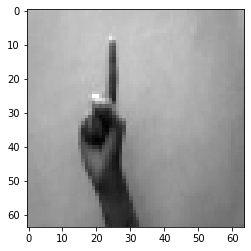

In [85]:
import matplotlib.pyplot as plt
plt.imshow(b, cmap = 'gray')

In [86]:
X = np.array(df['Pixel'].tolist())
X.shape

(16501, 4096)

In [87]:
y = np.array(df['Label'], dtype=int)

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size = 0.4, random_state=40)

In [89]:
Model = svm.SVC(kernel="rbf")

In [90]:
# Fitting Model
Model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
Y_pred1 = Model.predict(X_test)

In [92]:
Y_pred1.shape

(6601,)

In [93]:
Y_test.shape

(6601,)

In [94]:
accuracy = round(accuracy_score(Y_test,Y_pred1)*100,2)

In [95]:
# Accuracy of svc model
accuracy

79.99

In [96]:
import matplotlib.pyplot as plt
def validate(ind,Model):
  plt.imshow(df['Pixel'].iloc[ind].reshape(64,64))
  test = np.array(df['Pixel'].iloc[ind])
  test = test.reshape(4096)
  pred_1= Model.predict(np.array([test]))
  print(pred_1)
      
  hand=int(pred_1)
  print("Predicted Number: "+ str(hand))
  print("Actual Number: "+ str(np.array(df['Label'].iloc[ind])))

[0]
Predicted Number: 0
Actual Number: 0


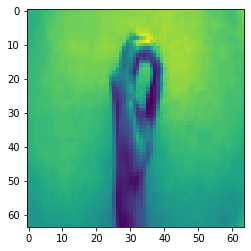

In [97]:
validate(50,Model)

[0]
Predicted Number: 0
Actual Number: 0


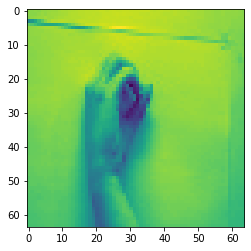

In [98]:
validate(200,Model)

[1]
Predicted Number: 1
Actual Number: 1


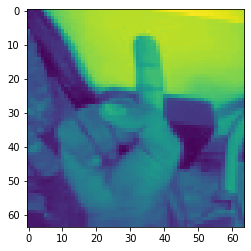

In [99]:
validate(1922,Model)

[5]
Predicted Number: 5
Actual Number: 5


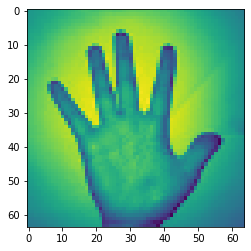

In [100]:
validate(9000,Model)

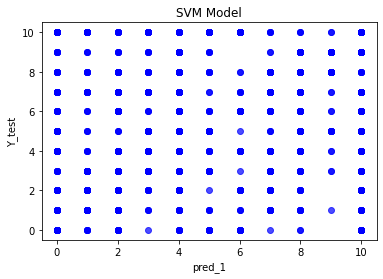

In [101]:
plt.scatter(Y_pred1, Y_test, alpha=.7, color = 'b')
plt.xlabel('pred_1')
plt.ylabel('Y_test')
plt.title('SVM Model')
plt.show()